### Ultimate Inc. Data Science Challenge
    Varun Nadgir

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Part 1

The attached *logins.json* file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
# read in json file
logins = pd.read_json('logins.json')

logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# re-index with datetime as the index
logins.set_index('login_time', inplace=True)

In [4]:
# initialize count column
logins['count'] = 1

In [5]:
# resample datetime data by every 15 minutes, apply count
logins_15min = logins.resample('15Min').count()

logins_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


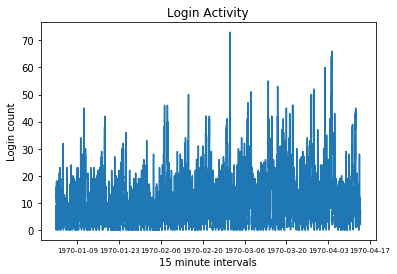

In [6]:
plt.title('Login Activity')
plt.xlabel('15 minute intervals')
plt.xticks(size=7)
plt.ylabel('Login count')
plt.plot(logins_15min.index, logins_15min['count'])
plt.show()

The above plot shows us the patterns of logins that occur over a few months. It looks like the activity has a pretty consistent growth pattern where it reaches a peak, and then drops down before it grows again. Before exploring further, I would hypothesize that the higher login counts occur either at nighttime or during the weekend - we can distinguish which by shrinking the window of the plot.

In [7]:
# resample to daily logins count
logins_daily = logins.resample('D').count()

logins_daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


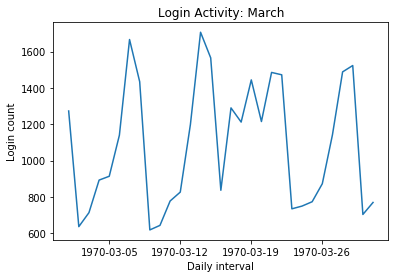

In [13]:
plt.title('Login Activity: March')
plt.xlabel('Daily interval')
plt.ylabel('Login count')
plt.plot(logins_daily.loc['1970-03-01':'1970-03-31'])
plt.show()

Checking on Google tells me that March 5th 1970 was a Thursday (implying the other xticks are as well), meaning that these peaks are very likely occurring on the weekends and dropping on Mondays. There is some strange behavior around the weekend of March 21st, where the activity climbs up to the peak for that week earlier than normal. This could be due to holidays, or another reason that people are becoming free before the weekend starts.

### Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The main metric for this experiment would be the activity, since post-change activity could be compared to the original activity to see if there is any difference. If there is no difference even when the tolls are reimbursed, then it probably doesn't make sense to continue with the new system. However, if activity goes up and the overall revenue minus the reimbursed toll costs results in higher income, then the new system would seem beneficial for everyone. 


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment   
    * what statistical test(s) you will conduct to verify the significance of the observation
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
We would first record levels of activity (and perhaps the resulting income) of the cities before the change is implemented. Then, after some time where we can collect enough data (whether by following certain customers or by just tracking total transactions), we can perform a *one sample z test* to see if this new value of activity is significantly different than the original. We would either accept or reject our null hypothesis that the two levels of activity are the same. If it turns out that the activity is the same, we would need to identify more specific areas to introduce changes to the system. For example, we could have the reimbursement period only between certain hours, or only on the weekend.

### Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file *ultimate_data_challenge.json*. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice)

In [35]:
# read in json file as a list of dictionaries 
ultimate_data_challenge = open('ultimate_data_challenge.json')
user_dict = json.loads(ultimate_data_challenge.read())

In [83]:
# initialize data and column names
data = []
col_names = [x for x in user_dict[0]]

# loop through every dictionary and make the values into a list
for i in range(len(user_dict)):
    temp_list = []
    for x in user_dict[i]:
        temp_list.append(user_dict[i][x])
    data.append(temp_list)

In [86]:
# create dataframe
df = pd.DataFrame(data, columns=col_names)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


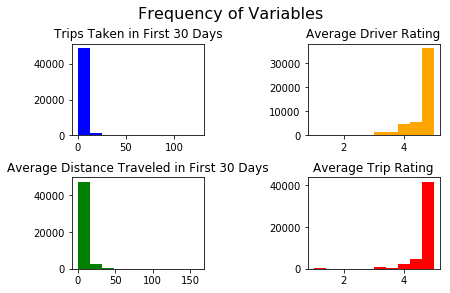

In [123]:
# plot various features as histogram to see distribution
fig, axs = plt.subplots(2,2, constrained_layout=True)

fig.suptitle('Frequency of Variables', size=16)

# top left
axs[0][0].hist(df['trips_in_first_30_days'], color='blue')
axs[0][0].set_title('Trips Taken in First 30 Days')

# top right
axs[0][1].hist(df['avg_rating_of_driver'], color='orange')
axs[0][1].set_title('Average Driver Rating')

# bottom left
axs[1][0].hist(df['avg_dist'], color='green')
axs[1][0].set_title('Average Distance Traveled in First 30 Days')

# bottom right
axs[1][1].hist(df['avg_rating_by_driver'], color='red')
axs[1][1].set_title('Average Trip Rating')

plt.show()

From these plots, we can see that the majority of customers take fewer than ~10 trips in the first 30 days, with an average distance traveled of around ~25 miles in that same time. The riders and drivers are also mostly 4-5 rating, which means most customers and drivers are happy with their trip.

In [134]:
# turn dates into datetime datatype
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# calculate length of activity as difference of signup and last trip
df['length_of_activity'] = df['last_trip_date'] - df['signup_date']
df['length_of_activity'] = df['length_of_activity'].dt.days

In [136]:
# users which are active even after 150 days (approx greater than 5 months)
df['6monthuser'] = df['length_of_activity']>150
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,length_of_activity,6monthuser
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,False


In [137]:
# look for which columns are missing values
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,length_of_activity
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,92.790100
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753,62.129822
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,27.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,110.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,150.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,181.000000


In [138]:
# fill NA values with mean of column
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [139]:
# select columns to use as features
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'ultimate_black_user',
           'avg_dist', 'avg_rating_by_driver', 'length_of_activity']

Xs = df[features]
Ys = df['6monthuser']

In [140]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(Xs,Ys,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.98584


1. By filling in N/A values with the mean of the column, we can retain all of the original users. 
2. Using logistic regression to model based on features having to do with each user, we can model whether or not a user will still be using the service after 150 days (approx. greater than 5 months). According to the accuracy score, the model predicted correctly 98.58% of the time. This may be due to how drastic the differences are in user behavior.
3. Following the results of this model, one might think user behavior is very black and white - some users sign up and only do a couple rides (which may end poorly for them), or they are committed to using the service based on good rides early on. One way to retain riders could be to apply credits to their account for the first few rides so they can try it out free of charge. This would avoid the feeling of sunk money for bad rides at the beginning. They could also look at various promotions on weekends or after certain hours to boost usage during the surge times.